# Parcial 1 - Ciencia de Datos Aplicada

Juan Felipe Palacios Sánchez - jf.palacios - 201616389


Al entregar la solución de este parcial, yo, Juan Felipe Palacios con código 201616389 me comprometo a no
conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre
aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o
intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy
consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este
parcial.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Punto 1
Un análisis exploratorio y de calidad de datos a partir de los datos históricos
suministrados. En la medida de lo posible, incluya técnicas de análisis univariado, bivariado, gráficas y no gráficas. Realice la limpieza y preparación correspondiente para que puedan ser consumidos por los algoritmos de machine learning que va a utilizar. Adjunte la evidencia de como quedan los datos preparados, explique y justifique el proceso implementado.


In [2]:
df_history = pd.read_csv('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Parcial_1/losalpes_history.csv')
df_history.head()

,id,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
0,48540006,Manhattan,Hell's Kitchen,40.76212,-73.98820,United States,True,strict,Entire home/apt,2011.0,$ 851,$ 170,4.0,199.0,112.0,1.0
1,35079903,Manhattan,Midtown,40.74623,-73.98499,United States,True,flexible,Hotel room,2021.0,$ 466,$ 93,1.0,161.0,13.0,5.0
2,50681273,Manhattan,Upper West Side,40.78859,-73.97568,United States,False,flexible,Private room,2004.0,$ 874,$ 175,14.0,0.0,1.0,2.0
3,13039267,Manhattan,Financial District,40.70817,-74.00511,United States,False,strict,Private room,2012.0,$ 813,$ 163,1.0,0.0,5.0,3.0
4,8998640,Manhattan,Lower East Side,40.72130,-73.98900,United States,True,moderate,Entire home/apt,2007.0,$ 326,$ 65,4.0,301.0,9.0,3.0


In [3]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102083 entries, 0 to 102082
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   102083 non-null  int64  
 1   neighbourhood group  101463 non-null  object 
 2   neighbourhood        101476 non-null  object 
 3   lat                  101484 non-null  float64
 4   long                 101484 non-null  float64
 5   country              100967 non-null  object 
 6   instant_bookable     101387 non-null  object 
 7   cancellation_policy  101416 non-null  object 
 8   room type            101492 non-null  object 
 9   construction year    101279 non-null  float64
 10  price                101245 non-null  object 
 11  service fee          101220 non-null  object 
 12  minimum nights       101089 non-null  float64
 13  availability 365     101049 non-null  float64
 14  number of reviews    101313 non-null  float64
 15  review rate numbe

De la función info encontramos la cantidad de filas no nulas para cada columna y el tipo de variable asignado por pandas. Se puede observar que ninguna columna esta completa. El precio y el service fee estan como objetos lo cual toca cambiar a número. Se procede a quitar los duplicados por el id, ya que este valor deberia ser unico para cada fila. 

In [4]:
df_history.shape

(102083, 16)

In [5]:
df_history = df_history.drop_duplicates(subset=['id'])

In [6]:
df_history.shape

(101547, 16)

In [7]:
df_history.isna().sum()

id                        0
neighbourhood group     614
neighbourhood           601
lat                     593
long                    593
country                1110
instant_bookable        690
cancellation_policy     661
room type               585
construction year       798
price                   832
service fee             857
minimum nights          979
availability 365       1028
number of reviews       764
review rate number      896
dtype: int64

### Columnas string

neighbourhood group

In [8]:
df_history['neighbourhood group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', nan,
       'Quens', 'Manattan', 'Broolkyn', 'Manhatan', 'brookln', 'manhatan'],
      dtype=object)

Encontramos que existen varios nombres erroneos, para solucionar esto vamos a hacer uso del metodo de Levenshtein. Primero debemos cambiar los NaN por strings vacios

In [9]:
df_history['neighbourhood group'].fillna('',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
!pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pylev

In [12]:
def fix_neighbourhood(row):
  boroughs = ['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
  min_lev = 15
  if row == '':
    return row
  else:
    for borough in boroughs:
      lev = pylev.levenshtein(row, borough)
      if min_lev > lev :
        min_lev = lev
        borough_cambio = borough
        pass
    return borough_cambio

In [13]:
df_history['neighbourhood group'] = df_history['neighbourhood group'].apply(fix_neighbourhood)
df_history['neighbourhood group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', ''],
      dtype=object)

In [14]:
df_history['neighbourhood group'].replace('',np.nan,inplace=True)

Como no se pueden imputar los valores para la columna de neighbourhood group se eliminan las filas con valores nulos para esta columna

In [15]:
df_history = df_history.dropna(subset=['neighbourhood group'])

In [16]:
df_history.isna().sum()

id                       0
neighbourhood group      0
neighbourhood           16
lat                      8
long                     8
country                524
instant_bookable       104
cancellation_policy     75
room type                0
construction year      208
price                  246
service fee            272
minimum nights         393
availability 365       432
number of reviews      179
review rate number     309
dtype: int64

Con la funcion creada dejamos todos los neighbourhood con el mismo nombre y las filas que no tenian nombre las dejamos iguales.

In [17]:
df_history['neighbourhood'].sort_values().unique()

array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
       'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
       'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater',
       'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
       'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
       'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale',
       'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick',
       'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
       'Castleton Corners', 'Chelsea', 'Chelsea, Staten Island',
       'Chinatown', 'City Island', 'Civic Center', 'Claremont Village',
       'Clason Point', 'Clifton', 'Clinton Hill', 'Co-op City',
       'Cobble Hill', 'College Point', 'Columbia St', 'Concord',
       'Concourse', 'Concourse Village', 'Coney Island', 'Corona',
       'Crown Heights', 'Cypress Hills', 'DUMBO', 'Ditmars Steinway',
       'Dongan Hills', 'Douglaston',

La columna de neighbourhood parece no tener ningun valor erroneo. Se procede con las demas columnas.

In [18]:
df_history['country'].unique()

array(['United States', nan, 'United States of America'], dtype=object)

La columna de Country tiene diferentes nombres y valores nulos. Todos se pasaran al mismo nombre. Se asume que todos los datos son de Estados Unidos por lo que los valores nulos se les sera asignado tambien el mismo nombre

In [19]:
df_history['country'].replace({'United States of America': 'USA', 'United States':'USA'}, inplace=True)
df_history['country'].fillna('USA',inplace=True)
df_history['country'].unique()

array(['USA'], dtype=object)

Todos los valores de la columna Country fueron establecidos como USA para usar el mismo nombre de pais.

In [20]:
df_history['instant_bookable'].unique()

array([True, False, nan], dtype=object)

La columna de instant_bookable parece no tener ningun problema.

In [21]:
df_history['cancellation_policy'].unique()

array(['strict', 'flexible', 'moderate', nan], dtype=object)

La columna de cancellation_policy parece no tener ningun error.

In [22]:
df_history['room type'].unique()

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

La columna de room type parece no tener ningun error.

### Columnas número

Las primeras columnas que toca transformar son las de precio y service fee porque tienen el signo peso en el numero y se quitan las comas que se encontraron en algunos valores de la columna de precio. Se quitan las comas para que quede un numero de tres digitos pues se cree que el precio sin la coma esta en el rango de precios del dataset.

In [23]:
df_history['price'] = df_history['price'].replace({r'\$':'',r',':''}, regex = True).str.strip()
df_history['service fee'] = df_history['service fee'].replace({r'\$':''}, regex = True).str.strip()

In [24]:
df_history['price'] = df_history['price'].astype(float)
df_history['service fee'] = df_history['service fee'].astype(float)

Con las columnas de precio y service fee convertidas en numero se procede a analizar los minimos, maximos y los percentiles de cada columna numerica.

In [25]:
df_history.describe()

,id,lat,long,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
count,1.009330e+05,100925.000000,100925.000000,100725.000000,100687.000000,100661.000000,100540.000000,100501.000000,100754.000000,100624.000000
mean,2.917841e+07,40.728071,-73.949819,2012.459429,454.689414,126.204478,8.141655,140.975244,27.430752,3.278900
std,1.627656e+07,0.055825,0.049340,7.905685,851.454749,389.818876,30.728882,135.460773,49.495815,1.285293
min,1.001254e+06,40.499790,-74.249840,1020.000000,-611.000000,-193.000000,-1223.000000,-10.000000,0.000000,1.000000
25%,1.506234e+07,40.688740,-73.982610,2007.000000,137.000000,68.000000,2.000000,3.000000,1.000000,2.000000
50%,2.918410e+07,40.722270,-73.954560,2012.000000,427.000000,125.000000,3.000000,96.000000,7.000000,3.000000
75%,4.327935e+07,40.762730,-73.932580,2018.000000,710.000000,182.000000,5.000000,268.000000,30.000000,4.000000
max,5.736742e+07,40.916970,-73.705220,2022.000000,254000.000000,122000.000000,5645.000000,3677.000000,1024.000000,5.000000


* En la columna del año de construccion el valor minimo parece estar mal porque es 1020. Se revisara observando un diagrama de caja de la variable.
* En la columna de precio se tienen precios negativos, y el precio mayor esta en tres ordenes de magnitud mayor que la media. Se revisara observando un diagrama de caja de la variable.
* En la columna de service fee se tienen valores negativos, y el service fee mayor esta en tres ordenes de magnitud mayor que la media. Se revisara observando un diagrama de caja de la variable.
* En la columna de min noches se tienen valores negativos y el mayor supera el maximo de dias es extremadamente mayor. Se revisara observando un diagrama de caja de la variable.
* La columna de disponibilidad tambien presenta valores negativos y un valor maximo mucho mas grande que el limite de 365 dias. Se revisara observando un diagrama de caja de la variable.
* La columna de number of reviews parece estar bien y como es nuestra variable dependiente no se va a realizar ningun filtro sobre esta.
* La columna review rate number parece estar bien. Se revisara observando un diagrama de caja de la variable.

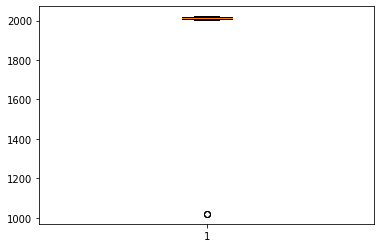

In [26]:
plt.boxplot(df_history['construction year'].dropna())
plt.show()

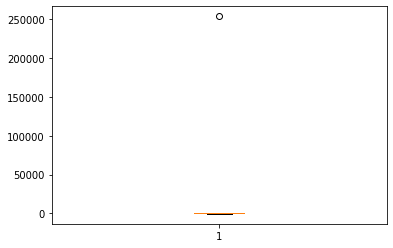

In [27]:
plt.boxplot(df_history['price'].dropna())
plt.show()

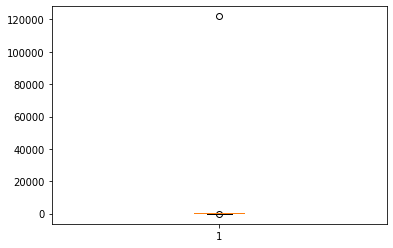

In [28]:
plt.boxplot(df_history['service fee'].dropna())
plt.show()

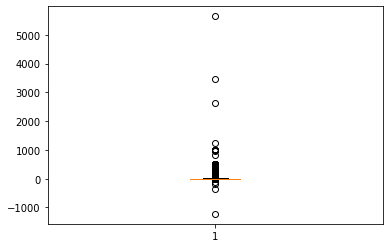

In [29]:
plt.boxplot(df_history['minimum nights'].dropna())
plt.show()

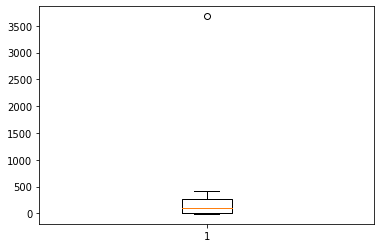

In [30]:
plt.boxplot(df_history['availability 365'].dropna())
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

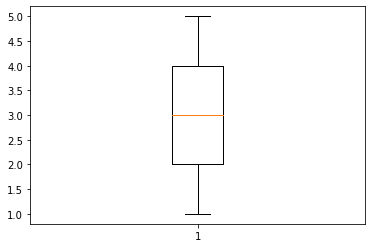

In [31]:
plt.boxplot(df_history['review rate number'].dropna())
plt.show

De la distribucion de la variable de construction year se encuentra que el valor minimo esta por fuera del rango de los demas valores y solo es un outlier.

De la distribucion de la variable de price se encuentra que el valor maximo esta por fuera del rango de los demas valores y solo es un outlier.

De la distribucion de la variable de service fee se encuentra que el valor minimo y maximo esta por fuera del rango de los demas valores y solo son esos dos outliers.

De la distribucion de la variable de minimum nights se encuentra que existen muchos valores tanto negativos como positivos por fuera de los cuartiles 1 y 3, ademas existen varios outliers.

De la distribucion de la variable de availability 365 se encuentra que el valor maximo esta por fuera del rango de los demas valores y solo es un outlier.

De la distribucion de review rate number se concluye que esta columna esta bien.

### Transformaciones

Transformaciones para cada columna:

* Para las columnas con outliers (valores maximos y minimos muy fuera del rango) se filtraran para ignorar estos valores. Se va a utilizar la regla de maximo 3 desviaciones estandar de la media para eliminar outliers.
* Para availability 365 se filtra hasta valores de 365 porque es el máximo en un año.
* Los valores negativos en prices, service fee, minimum nights y availability 365 se multiplican por -1.

In [32]:
def valores_negativos(row):
  if row < 0 and ~np.isnan(row):
    return row*-1
  else:
    return row

In [33]:
df_history['availability 365'] = df_history['availability 365'].apply(valores_negativos)
df_history['price'] = df_history['price'].apply(valores_negativos)
df_history['service fee'] = df_history['service fee'].apply(valores_negativos)
df_history['minimum nights'] = df_history['minimum nights'].apply(valores_negativos)

In [34]:
df_history.isna().sum()

id                       0
neighbourhood group      0
neighbourhood           16
lat                      8
long                     8
country                  0
instant_bookable       104
cancellation_policy     75
room type                0
construction year      208
price                  246
service fee            272
minimum nights         393
availability 365       432
number of reviews      179
review rate number     309
dtype: int64

Si se aplican los filtros antes de cambiar los valores NaN estos se borraran, por lo que primero se imputaran para cada columna los valores NaN de acuerdo a la moda de cada variable. Se imputa el valor de la moda porque no esta alterada por los outliers. Esto excepto para la variable dependiente que es number of reviews ya que puede afectar el modelo.

In [35]:
df_history['lat'] = df_history['lat'].fillna(df_history['lat'].mode()[0])
df_history['long'] = df_history['long'].fillna(df_history['long'].mode()[0])
df_history['construction year'] = df_history['construction year'].fillna(df_history['construction year'].mode()[0])
df_history['price'] = df_history['price'].fillna(df_history['price'].mode()[0])
df_history['service fee'] = df_history['service fee'].fillna(df_history['service fee'].mode()[0])
df_history['minimum nights'] = df_history['minimum nights'].fillna(df_history['minimum nights'].mode()[0])
df_history['availability 365'] = df_history['availability 365'].fillna(df_history['availability 365'].mode()[0])
df_history['review rate number'] = df_history['review rate number'].fillna(df_history['review rate number'].mode()[0])

In [36]:
df_history.isna().sum()

id                       0
neighbourhood group      0
neighbourhood           16
lat                      0
long                     0
country                  0
instant_bookable       104
cancellation_policy     75
room type                0
construction year        0
price                    0
service fee              0
minimum nights           0
availability 365         0
number of reviews      179
review rate number       0
dtype: int64

Como nos importan las filas que tengan datos en la columna de number of reviews se eliminaran las que tengan valores nulos.

In [37]:
df_history = df_history.dropna(subset=['number of reviews'])

In [38]:
df_history.isna().sum()

id                       0
neighbourhood group      0
neighbourhood           16
lat                      0
long                     0
country                  0
instant_bookable       104
cancellation_policy     75
room type                0
construction year        0
price                    0
service fee              0
minimum nights           0
availability 365         0
number of reviews        0
review rate number       0
dtype: int64

Despues de imputar valores para los nulos y escoger solo las filas que nos interesan, se prosigue con los filtros para eliminar los outliers.

In [39]:
df_history = df_history[df_history['construction year'] > (df_history['construction year'].mean() - df_history['construction year'].std() * 3)]
df_history = df_history[df_history['price'] < (df_history['price'].mean() + df_history['price'].std() * 3)]
df_history = df_history[df_history['service fee'] < (df_history['service fee'].mean() + df_history['service fee'].std() * 3)]
df_history = df_history[df_history['minimum nights'] < (df_history['minimum nights'].mean() + df_history['minimum nights'].std() * 3)]
df_history = df_history[df_history['availability 365'] <= 365]

In [40]:
df_history.describe()

,id,lat,long,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
count,9.764500e+04,97645.000000,97645.000000,97645.000000,97645.000000,97645.000000,97645.000000,97645.000000,97645.000000,97645.000000
mean,2.967095e+07,40.727937,-73.949521,2012.494260,451.537938,125.345261,7.167863,133.100599,27.269937,3.292324
std,1.604427e+07,0.055927,0.049681,5.761096,294.324108,66.391248,11.113772,129.755492,49.241080,1.281759
min,1.001254e+06,40.499790,-74.249840,2003.000000,50.000000,10.000000,1.000000,0.000000,0.000000,1.000000
25%,1.599628e+07,40.688680,-73.982570,2008.000000,135.000000,68.000000,1.000000,2.000000,1.000000,2.000000
50%,2.976622e+07,40.722130,-73.954400,2012.000000,425.000000,125.000000,3.000000,89.000000,7.000000,3.000000
75%,4.346106e+07,40.762620,-73.932130,2017.000000,710.000000,183.000000,5.000000,252.000000,30.000000,4.000000
max,5.736742e+07,40.916970,-73.705220,2022.000000,999.000000,240.000000,100.000000,365.000000,1024.000000,5.000000


Con los datos ya mejorados se procede a seleccionar las columnas necesarias para la regresion.

In [41]:
df_history.columns

Index(['id', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'instant_bookable', 'cancellation_policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'availability 365', 'number of reviews', 'review rate number'],
      dtype='object')

Las columnas que no se tendran en cuenta son las del id, neighbourhood y country. Esto debido a que el id es una variable que no nos interesa para la regresion; el neighbourhood se puede ubicar por la latitud, longitud y el neighbourhood group; el pais es el mismo para todos los datos.

Toca tambien revisar las columnas que cuenta el nuevo dataset para pasar en el modelo.

In [42]:
df_new = pd.read_csv('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Parcial_1/losalpes_new.csv')
df_new.columns

Index(['id', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'instant_bookable', 'cancellation_policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'availability 365'],
      dtype='object')

Como el nuevo dataset no tiene la columna de review rate number, tampoco se tendra en cuenta para el modelo.

In [43]:
df_history_reg = df_history.drop(['id','neighbourhood','country','review rate number'], axis=1)
df_history_reg.head()

,neighbourhood group,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews
0,Manhattan,40.76212,-73.98820,True,strict,Entire home/apt,2011.0,851.0,170.0,4.0,199.0,112.0
1,Manhattan,40.74623,-73.98499,True,flexible,Hotel room,2021.0,466.0,93.0,1.0,161.0,13.0
2,Manhattan,40.78859,-73.97568,False,flexible,Private room,2004.0,874.0,175.0,14.0,0.0,1.0
3,Manhattan,40.70817,-74.00511,False,strict,Private room,2012.0,813.0,163.0,1.0,0.0,5.0
4,Manhattan,40.72130,-73.98900,True,moderate,Entire home/apt,2007.0,326.0,65.0,4.0,301.0,9.0


In [44]:
df_history_reg.shape

(97645, 12)

Para el modelo de regresion se deben cambiar las variables categoricas por numeros. Para esto se utiliza dummies de pandas y la columna de instant_bookable se cambia por 0 y 1 si es falso o verdadero respectivamente.

Ahora se realiza una matriz de correlación.

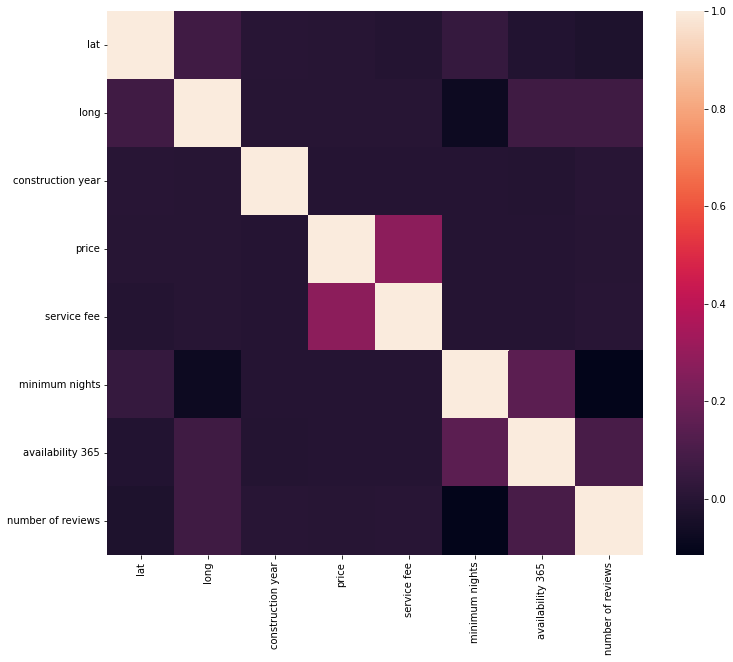

In [45]:
plt.figure(1,figsize=(12,10))
sns.heatmap(df_history_reg.corr())

Se puede observar que en general las variables tienen poca correlacion. Los unicos puntos donde se aprecia una mayor correlacion es en el precio y la tarifa de servicio y el numero minimo de noches y la disponibilidad 365.

In [46]:
def change_true_false(row):
  if row:
    return 1
  else:
    return 0

In [47]:
df_history_reg['instant_bookable'] = df_history_reg['instant_bookable'].apply(change_true_false)

In [48]:
df_policy = pd.get_dummies(df_history_reg['neighbourhood group'])
df_history_reg = pd.concat([df_history_reg,df_policy], axis = 1).drop('neighbourhood group',axis=1)

In [49]:
df_policy = pd.get_dummies(df_history_reg['cancellation_policy'])
df_history_reg = pd.concat([df_history_reg,df_policy], axis = 1).drop('cancellation_policy',axis=1)

In [50]:
df_room = pd.get_dummies(df_history_reg['room type'])
df_history_reg = pd.concat([df_history_reg,df_room], axis = 1).drop('room type',axis=1)

In [51]:
df_history_reg.head()

,lat,long,instant_bookable,construction year,price,service fee,minimum nights,availability 365,number of reviews,Bronx,...,Manhattan,Queens,Staten Island,flexible,moderate,strict,Entire home/apt,Hotel room,Private room,Shared room
0,40.76212,-73.98820,1,2011.0,851.0,170.0,4.0,199.0,112.0,0,...,1,0,0,0,0,1,1,0,0,0
1,40.74623,-73.98499,1,2021.0,466.0,93.0,1.0,161.0,13.0,0,...,1,0,0,1,0,0,0,1,0,0
2,40.78859,-73.97568,0,2004.0,874.0,175.0,14.0,0.0,1.0,0,...,1,0,0,1,0,0,0,0,1,0
3,40.70817,-74.00511,0,2012.0,813.0,163.0,1.0,0.0,5.0,0,...,1,0,0,0,0,1,0,0,1,0
4,40.72130,-73.98900,1,2007.0,326.0,65.0,4.0,301.0,9.0,0,...,1,0,0,0,1,0,1,0,0,0


In [52]:
df_history_reg.shape

(97645, 21)

Con las variables cualitativas expresadas como numeros se procede a definir los datos de X y Y, datos de test y train y normalizar los valores.

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
X = df_history_reg.drop('number of reviews',axis=1)
Y = df_history_reg['number of reviews']

In [55]:
X.head()

,lat,long,instant_bookable,construction year,price,service fee,minimum nights,availability 365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,flexible,moderate,strict,Entire home/apt,Hotel room,Private room,Shared room
0,40.76212,-73.98820,1,2011.0,851.0,170.0,4.0,199.0,0,0,1,0,0,0,0,1,1,0,0,0
1,40.74623,-73.98499,1,2021.0,466.0,93.0,1.0,161.0,0,0,1,0,0,1,0,0,0,1,0,0
2,40.78859,-73.97568,0,2004.0,874.0,175.0,14.0,0.0,0,0,1,0,0,1,0,0,0,0,1,0
3,40.70817,-74.00511,0,2012.0,813.0,163.0,1.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0
4,40.72130,-73.98900,1,2007.0,326.0,65.0,4.0,301.0,0,0,1,0,0,0,1,0,1,0,0,0


In [56]:
X.shape

(97645, 20)

In [57]:
X.columns

Index(['lat', 'long', 'instant_bookable', 'construction year', 'price',
       'service fee', 'minimum nights', 'availability 365', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'flexible',
       'moderate', 'strict', 'Entire home/apt', 'Hotel room', 'Private room',
       'Shared room'],
      dtype='object')

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=1)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Para observar como serian los resultados para un modelo de regresion linear normal se realizan los siguientes comandos:

In [60]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train_scaled,Y_train)

print('intercept: {}'.format(model.intercept_))

print('coefficients: {}'.format(model.coef_))

intercept: 27.451026176724092
coefficients: [  0.53468825   2.79610684  -0.02481983   0.39147675  -0.12260771
   0.58897785  -6.328259     5.73236669  -0.60874925   0.78190847
  -0.8953211    0.04475843   1.43152194 -10.75618019 -10.52215288
 -10.89144452   0.62963672   1.40324608  -0.30147001  -1.43305205]


De esto podemos conocer los coeficientes para cada variable y encontramos que las columnas que más afectan el numero de reviews son:
1. Si la poliza de cancellacion es strict.
2. Si la poliza de cancellacion es flexible.
3. Si la poliza de cancellacion es moderate.

Para comprobar el modelo obtenido se calculan los errores de MAE y RSEM del modelo con los datos de train y test.

In [61]:
preds_train = model.predict(X_train_scaled)
preds_test = model.predict(X_test_scaled)

In [62]:
print('MAE train:',mean_absolute_error(Y_train, preds_train), 'MAE test:',mean_absolute_error(Y_test, preds_test))
print('RSEM train:',np.sqrt(mean_squared_error(Y_train, preds_train)), 'RSEM test:', np.sqrt(mean_squared_error(Y_test, preds_test)))


MAE train: 30.2684631679856 MAE test: 29.991756034781965
RSEM train: 48.84118337761548 RSEM test: 48.00318151332202


Podemos observar que los errores para el grupo de test son un poco mayores para los de train pero no muy grandes por lo que se descarta que el modelo este sesgado a los datos de train y haya overfitting.

## Punto 2
Muestre los resultados tras el entrenamiento y selección del mejor modelo
obtenido a partir de los datos suministrados. Utilice las técnicas de transformación de datos, selección de atributos y regularización que considere convenientes.Explique cómo este modelo responde al objetivo planteado y si los resultados serían, de acuerdo a su criterio, suficientes para su uso por parte de la inmobiliaria. Recuerde argumentar sus decisiones con base en la interpretación cuantitativa y cualitativa de los resultados.


Ahora para encontrar el mejor modelo se van a utilizar transformaciones polinomiales y los dos tipos de regularizacion para observar los errores y comparar el RSEM para cada caso y asi escoger el mejor modelo. Para cada regularizacion tambien se variara el alpha.

In [63]:
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)

X_poly_2_train = poly_features_2.fit_transform(X_train_scaled)
X_poly_3_train = poly_features_3.fit_transform(X_train_scaled)

X_poly_2_test = poly_features_2.fit_transform(X_test_scaled)
X_poly_3_test = poly_features_3.fit_transform(X_test_scaled)

In [68]:
alphas = [0.1,0.5,0.9,1,10,20,30,50,75,100]

# Poly 2
for alpha in alphas:
    print('Ridge para un alpha = {}'.format(alpha))
    ridge_reg = Ridge(alpha=alpha, solver='cholesky')
    ridge_reg.fit(X_poly_2_train,Y_train)

    preds_train = ridge_reg.predict(X_poly_2_train)
    preds_test = ridge_reg.predict(X_poly_2_test)

    print('MAE train = {}'.format(mean_absolute_error(Y_train, preds_train)))
    print('MAE test = {}'.format(mean_absolute_error(Y_test, preds_test)))
    print('RMSE train = {}'.format(np.sqrt(mean_squared_error(Y_train, preds_train))))
    print('RMSE test = {}'.format(np.sqrt(mean_squared_error(Y_test, preds_test))))
    print('\n')

Ridge para un alpha = 0.1
MAE train = 28.858038055277085
MAE test = 28.825935888964285
RMSE train = 47.685388546338984
RMSE test = 47.27232329475481


Ridge para un alpha = 0.5
MAE train = 28.85808696649865
MAE test = 28.82421438501607
RMSE train = 47.68545862185287
RMSE test = 47.26799458937309


Ridge para un alpha = 0.9
MAE train = 28.858120082156603
MAE test = 28.822935145280997
RMSE train = 47.68557494256984
RMSE test = 47.264901657616676


Ridge para un alpha = 1
MAE train = 28.85815160111312
MAE test = 28.82267995218155
RMSE train = 47.68560737676689
RMSE test = 47.26426398916171


Ridge para un alpha = 10
MAE train = 28.859940287709826
MAE test = 28.814882911016717
RMSE train = 47.68760356510763
RMSE test = 47.251836789825944


Ridge para un alpha = 20
MAE train = 28.860535671815
MAE test = 28.81310770302108
RMSE train = 47.688526931874485
RMSE test = 47.250614758247615


Ridge para un alpha = 30
MAE train = 28.860950212250803
MAE test = 28.812537817051282
RMSE train = 47.68910

In [66]:
# Poly 3
alphas = [0.1,0.5,0.9,1,10]

for alpha in alphas:
    print('Ridge para un alpha = {}'.format(alpha))
    ridge_reg = Ridge(alpha=alpha, solver='cholesky')
    ridge_reg.fit(X_poly_3_train,Y_train)

    preds_train = ridge_reg.predict(X_poly_3_train)
    preds_test = ridge_reg.predict(X_poly_3_test)

    print('MAE train = {}'.format(mean_absolute_error(Y_train, preds_train)))
    print('MAE test = {}'.format(mean_absolute_error(Y_test, preds_test)))
    print('RMSE train = {}'.format(np.sqrt(mean_squared_error(Y_train, preds_train))))
    print('RMSE test = {}'.format(np.sqrt(mean_squared_error(Y_test, preds_test))))
    print('\n')

Ridge para un alpha = 0.1
MAE train = 28.20781666792288
MAE test = 29.11801319738617
RMSE train = 46.75893038609255
RMSE test = 51.12353319804696


Ridge para un alpha = 0.5
MAE train = 28.208529860903372
MAE test = 29.10541012487943
RMSE train = 46.75961032805202
RMSE test = 51.0324637871933


Ridge para un alpha = 0.9
MAE train = 28.209470104608716
MAE test = 29.096760082056566
RMSE train = 46.76019468505155
RMSE test = 50.962595622549145


Ridge para un alpha = 1
MAE train = 28.209695688489834
MAE test = 29.09488337158857
RMSE train = 46.7603284280153
RMSE test = 50.94686121469696


Ridge para un alpha = 10
MAE train = 28.21816816370825
MAE test = 29.014455346797334
RMSE train = 46.76659080137666
RMSE test = 50.124385497023766




De los resultados obtenidos el mejor modelo encontrado es una transformación polinomica 2 y una regularizacion Ridge con un alpha de 50.

In [73]:
modelo_final = Ridge(alpha=50, solver='cholesky')
modelo_final.fit(X_poly_2_train,Y_train)
preds_train = modelo_final.predict(X_poly_2_train)
preds_test = modelo_final.predict(X_poly_2_test)

print('MAE train = {}'.format(mean_absolute_error(Y_train, preds_train)))
print('MAE test = {}'.format(mean_absolute_error(Y_test, preds_test)))
print('RMSE train = {}'.format(np.sqrt(mean_squared_error(Y_train, preds_train))))
print('RMSE test = {}'.format(np.sqrt(mean_squared_error(Y_test, preds_test))))
print('\n')

MAE train = 28.86164660849249
MAE test = 28.812449048815893
RMSE train = 47.690061511746016
RMSE test = 47.250220989355114




## Punto 3
Utilice el mejor modelo obtenido para estimar la popularidad de los inmuebles próximos a publicarse. A partir de este resultado, apoye a la inmobiliaria en la definición del presupuesto de marketing que debe aprovisionar para promocionar los inmuebles menos populares sabiendo que la plataforma en la que se publican cobra por anuncio el 2% del precio del inmueble. Por ejemplo, si un inmueble tiene como precio \$200, la plataforma cobrará por publicar un anuncio para el inmueble un total de \$4. Usted es el encargado,a partir de los resultados de las predicciones, de definir el límite superior de comentarios para considerar un inmueble no popular. Explique esta decisión claramente así como el total de presupuesto que se debe aprovisionar acompañado del total de inmuebles a promocionar.


Primero se debe realizar las mismas transformaciones para el set de datos nuevo que se hicieron para encontrar el modelo.

In [112]:
df_new = pd.read_csv('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Parcial_1/losalpes_new.csv')
df_new.head()

,id,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365
0,27883434,Queens,Ozone Park,40.68432,-73.85862,United States,False,moderate,Private room,2006.0,$ 519,$ 104,1.0,NaN
1,55448727,Manhattan,Civic Center,40.71317,-74.00654,United States,False,moderate,Entire home/apt,2006.0,$ 987,$ 197,2.0,42.0
2,56858749,Queens,East Elmhurst,40.76441,-73.88943,NaN,True,flexible,Private room,2018.0,$ 999,$ 200,2.0,0.0
3,39029953,Manhattan,Gramercy,40.73442,-73.98383,United States,True,strict,Private room,2011.0,$ 497,$ 99,4.0,0.0
4,5567200,Manhattan,Upper West Side,40.79660,-73.97154,United States,True,strict,Entire home/apt,2022.0,$ 820,$ 164,4.0,376.0


In [113]:
df_new = df_new.drop_duplicates(subset=['id'])

In [114]:
df_new.dropna(inplace=True)

In [115]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 1 to 512
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   503 non-null    int64  
 1   neighbourhood group  503 non-null    object 
 2   neighbourhood        503 non-null    object 
 3   lat                  503 non-null    float64
 4   long                 503 non-null    float64
 5   country              503 non-null    object 
 6   instant_bookable     503 non-null    object 
 7   cancellation_policy  503 non-null    object 
 8   room type            503 non-null    object 
 9   construction year    503 non-null    float64
 10  price                503 non-null    object 
 11  service fee          503 non-null    object 
 12  minimum nights       503 non-null    float64
 13  availability 365     503 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 58.9+ KB


In [116]:
df_new['price'] = df_new['price'].replace({r'\$':'',r',':''}, regex = True).str.strip()
df_new['service fee'] = df_new['service fee'].replace({r'\$':''}, regex = True).str.strip()

In [117]:
df_new['price'] = df_new['price'].astype(float)
df_new['service fee'] = df_new['service fee'].astype(float)

In [118]:
df_new.describe()

,id,lat,long,construction year,price,service fee,minimum nights,availability 365
count,5.030000e+02,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2.985520e+07,40.730404,-73.950124,2012.667992,439.200795,127.870775,8.043738,135.049702
std,1.586652e+07,0.054912,0.047612,5.745872,296.730956,67.597629,21.054238,134.839507
min,1.445385e+06,40.538940,-74.169830,2003.000000,50.000000,10.000000,1.000000,-9.000000
25%,1.734804e+07,40.692035,-73.983865,2008.000000,119.000000,69.000000,1.000000,4.000000
50%,2.961600e+07,40.723170,-73.953040,2013.000000,401.000000,127.000000,3.000000,88.000000
75%,4.340389e+07,40.764070,-73.933930,2017.000000,693.000000,192.000000,5.000000,259.500000
max,5.723707e+07,40.891180,-73.727780,2022.000000,997.000000,240.000000,366.000000,425.000000


In [119]:
df_new_reg = df_new.drop(['id','neighbourhood','country'], axis=1)
df_new_reg.head()

,neighbourhood group,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365
1,Manhattan,40.71317,-74.00654,False,moderate,Entire home/apt,2006.0,987.0,197.0,2.0,42.0
3,Manhattan,40.73442,-73.98383,True,strict,Private room,2011.0,497.0,99.0,4.0,0.0
4,Manhattan,40.79660,-73.97154,True,strict,Entire home/apt,2022.0,820.0,164.0,4.0,376.0
5,Manhattan,40.74222,-73.99444,False,flexible,Entire home/apt,2012.0,111.0,221.0,29.0,220.0
6,Brooklyn,40.71640,-73.95438,True,moderate,Entire home/apt,2014.0,913.0,183.0,7.0,0.0


In [120]:
df_new_reg['instant_bookable'] = df_new_reg['instant_bookable'].apply(change_true_false)

df_policy = pd.get_dummies(df_new_reg['neighbourhood group'])
df_new_reg = pd.concat([df_new_reg,df_policy], axis = 1).drop('neighbourhood group',axis=1)

df_policy = pd.get_dummies(df_new_reg['cancellation_policy'])
df_new_reg = pd.concat([df_new_reg,df_policy], axis = 1).drop('cancellation_policy',axis=1)

df_room = pd.get_dummies(df_new_reg['room type'])
df_new_reg = pd.concat([df_new_reg,df_room], axis = 1).drop('room type',axis=1)

In [121]:
df_new_reg.head()

,lat,long,instant_bookable,construction year,price,service fee,minimum nights,availability 365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,flexible,moderate,strict,Entire home/apt,Hotel room,Private room,Shared room
1,40.71317,-74.00654,0,2006.0,987.0,197.0,2.0,42.0,0,0,1,0,0,0,1,0,1,0,0,0
3,40.73442,-73.98383,1,2011.0,497.0,99.0,4.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0
4,40.79660,-73.97154,1,2022.0,820.0,164.0,4.0,376.0,0,0,1,0,0,0,0,1,1,0,0,0
5,40.74222,-73.99444,0,2012.0,111.0,221.0,29.0,220.0,0,0,1,0,0,1,0,0,1,0,0,0
6,40.71640,-73.95438,1,2014.0,913.0,183.0,7.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0


In [122]:
df_new_reg.shape

(503, 20)

In [123]:
X_new_scaled = scaler.fit_transform(df_new_reg)
X_poly_2_new = poly_features_2.fit_transform(X_new_scaled)

In [124]:
pred_new = modelo_final.predict(X_poly_2_new)

In [125]:
len(pred_new)

503

In [126]:
df_new['num_reviews_pred'] = pred_new

In [127]:
df_new.drop(['id','neighbourhood','country'], axis=1,inplace=True)

In [128]:
df_new.describe()

,lat,long,construction year,price,service fee,minimum nights,availability 365,num_reviews_pred
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,40.730404,-73.950124,2012.667992,439.200795,127.870775,8.043738,135.049702,27.474140
std,0.054912,0.047612,5.745872,296.730956,67.597629,21.054238,134.839507,15.316258
min,40.538940,-74.169830,2003.000000,50.000000,10.000000,1.000000,-9.000000,-3.656061
25%,40.692035,-73.983865,2008.000000,119.000000,69.000000,1.000000,4.000000,17.407032
50%,40.723170,-73.953040,2013.000000,401.000000,127.000000,3.000000,88.000000,26.246860
75%,40.764070,-73.933930,2017.000000,693.000000,192.000000,5.000000,259.500000,36.858361
max,40.891180,-73.727780,2022.000000,997.000000,240.000000,366.000000,425.000000,219.592914


De los resultados obtenidos se encuentra que hay valores negativos por lo que se concluye que el modelo encontrado no se ajusta tan bien a los datos nuevos.


### Respuesta al negocio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


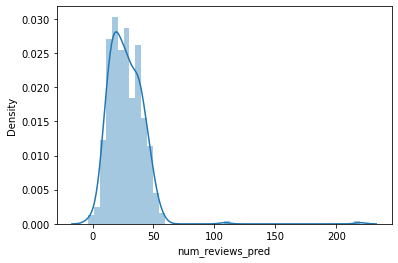

In [129]:
sns.distplot(df_new['num_reviews_pred'])

Todo inmuble popular deberia comportarse como un Outlier distanciandose de la mayoria de inmuebles, por eso los inmuebles populares son lo que esten por encima del percentil 0.75.

In [133]:
df_new_promocionar = df_new[df_new['num_reviews_pred'] < df_new['num_reviews_pred'].quantile(0.75)]
df_new_promocionar.shape

(377, 12)

In [134]:
sum(df_new_promocionar['price']*0.02)

3424.4999999999986

Dada esta regla de negocio escogida se deben promocionar 377 inmubles de los 503 inmubles nuevos. Y se deberia tener un presupuesto de \$3424.50 dolares.